<a href="https://colab.research.google.com/github/CristinaMarsh/Utils/blob/main/Results/Creating_Scatter_Density_Plots_in_Python_%EF%BC%88Results%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

# Generating sample data
np.random.seed(42)  # setting a seed for reproducibility
obs_sample = np.random.randn(10000) * 10
pre_sample = obs_sample + (np.random.randn(10000) * 5)  # adding some noise to create the pre_sample

# Creating a DataFrame
df = pd.DataFrame({
    'obs': obs_sample,
    'pre': pre_sample
})

df.head()

,obs,pre
0,4.967142,1.574668
1,-1.382643,-2.910140
2,6.476885,3.489980
3,15.230299,15.782389
4,-2.341534,3.644359


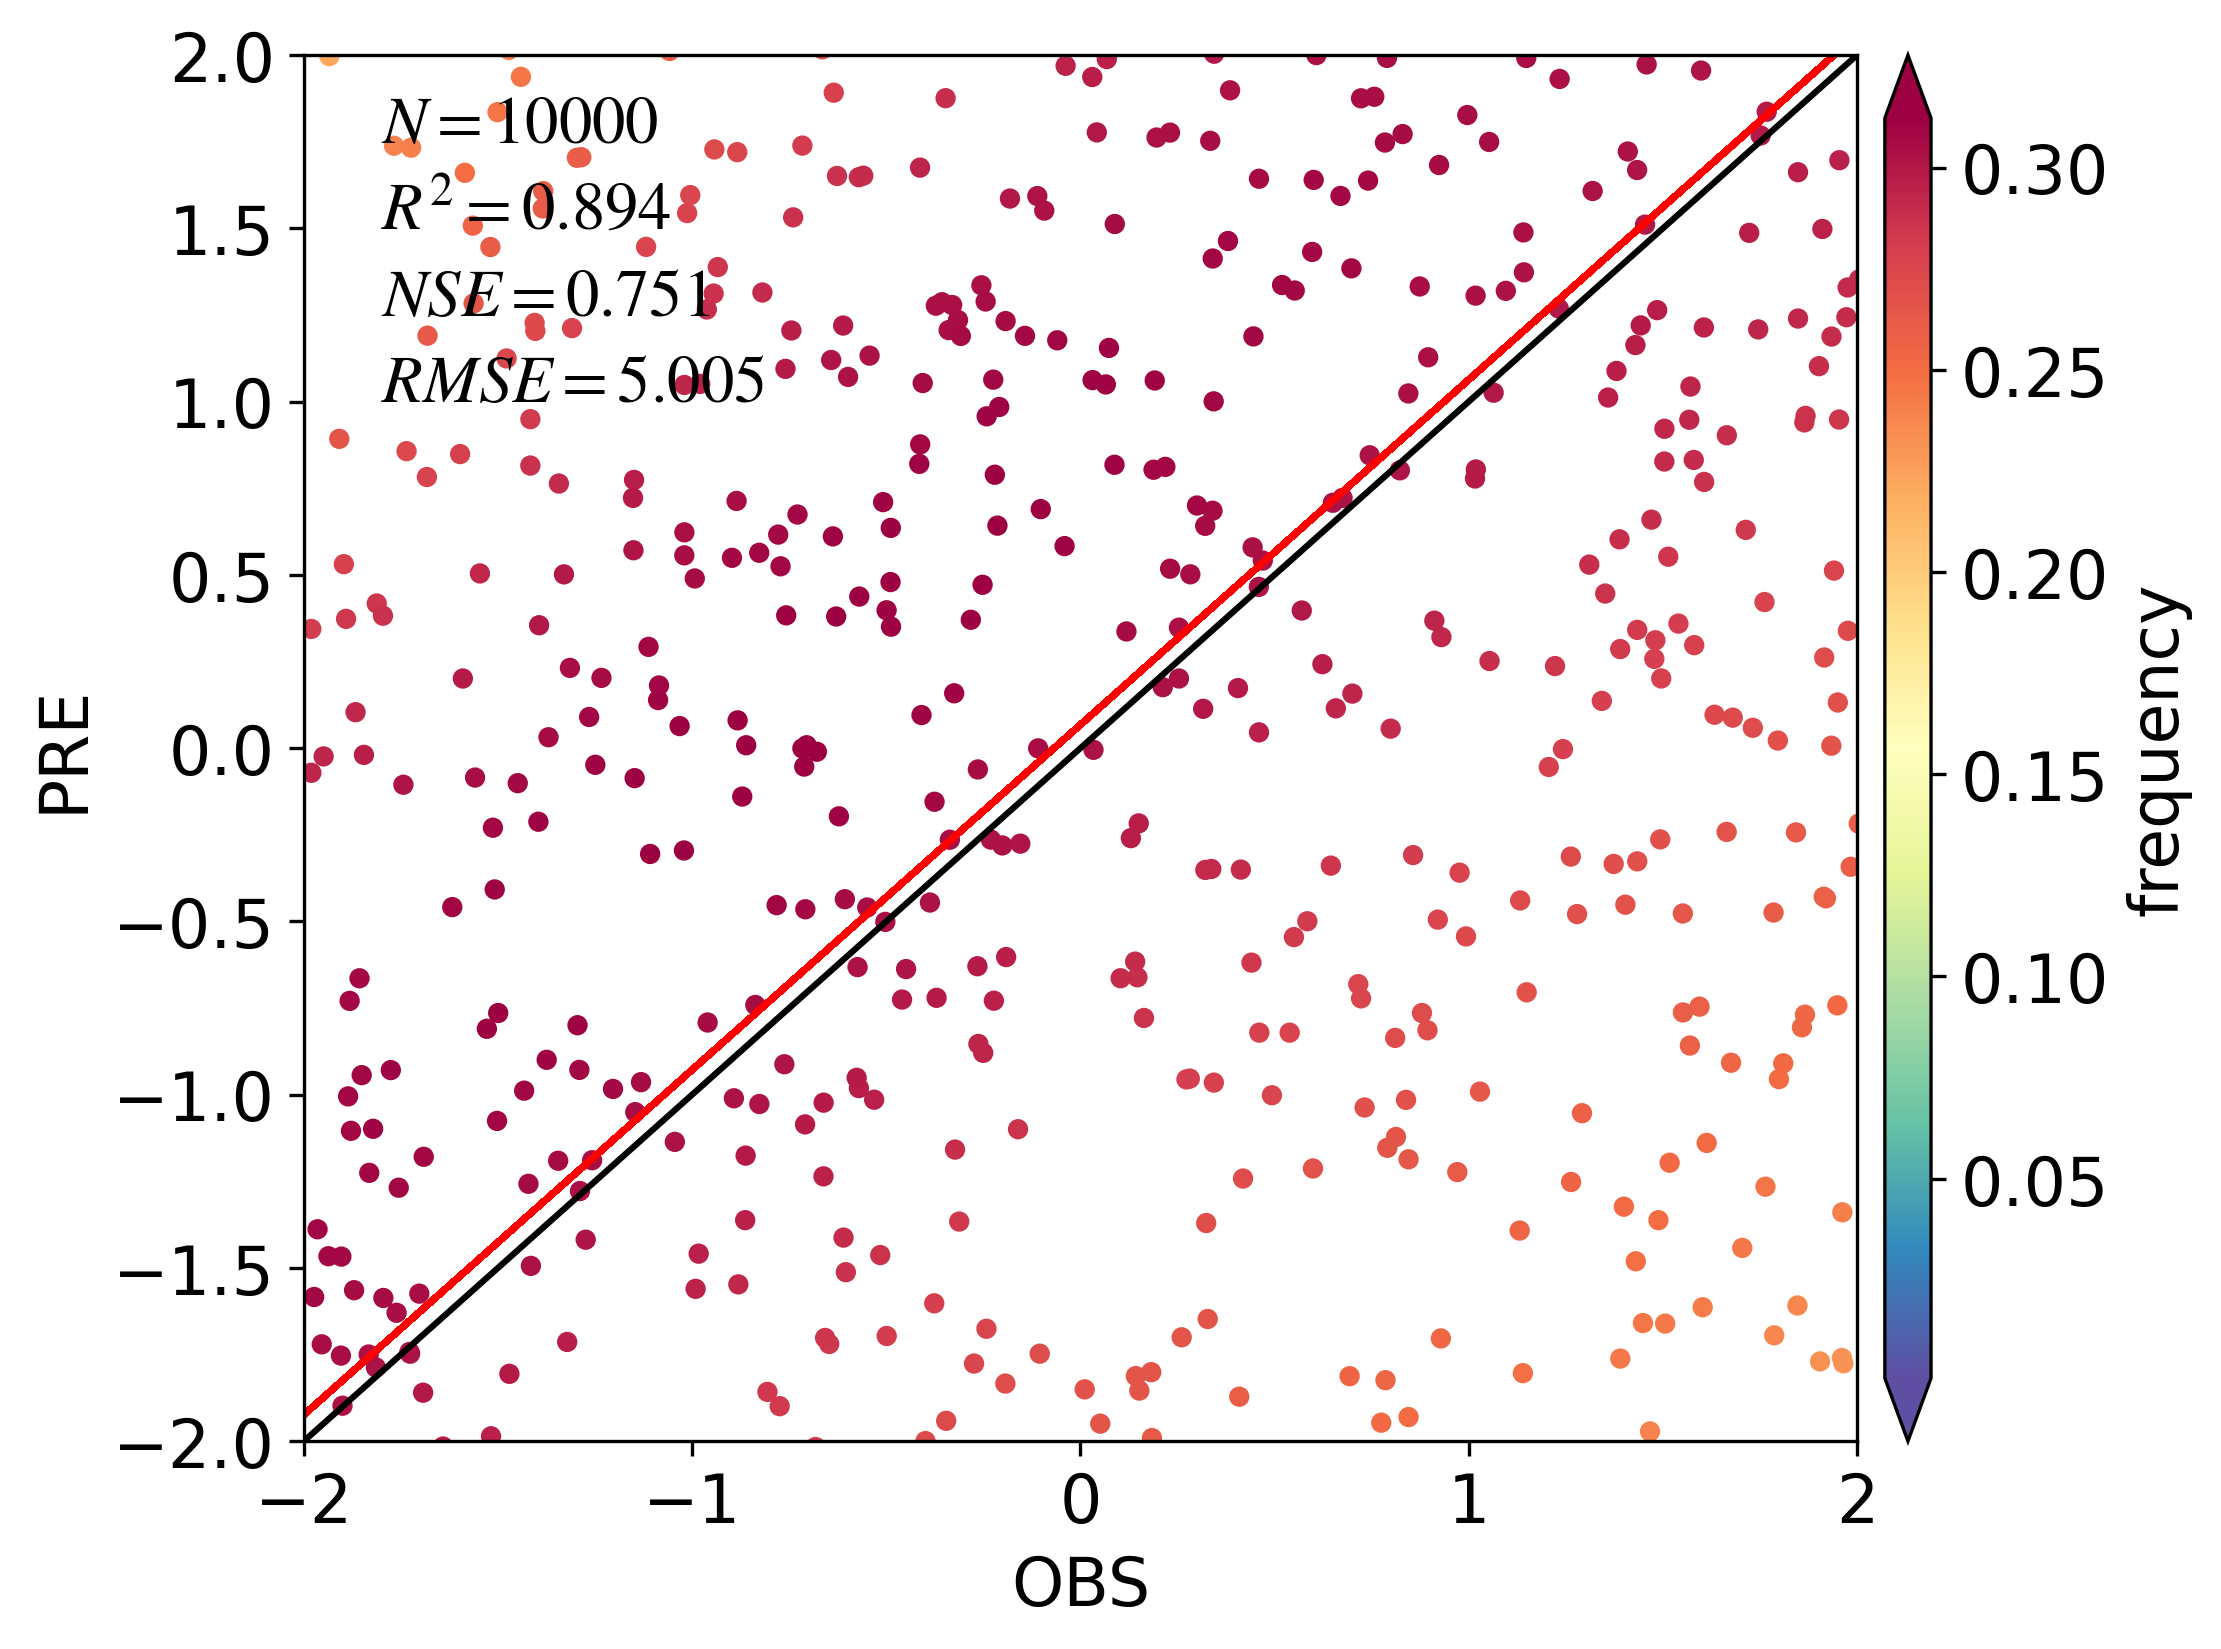

In [2]:
# Importing required libraries from the provided code
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
from statistics import mean
from sklearn.metrics import explained_variance_score, r2_score, median_absolute_error, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Configuration from provided code
config = {"font.family":'Arial', "font.size": 16, "mathtext.fontset":'stix'}
rcParams.update(config)

# Calculations from provided code
x = df['obs']
y = df['pre']
BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = pearsonr(x, y)[0]
adjR2 = 1-((1-r2_score(x,y))*(len(x)-1))/(len(x)-2)  # adjusted the formula as there's no "Config.in_channels" in the provided code
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
NSE = 1 - (RMSE ** 2 / np.var(x))

# Calculating scatter density
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x.iloc[idx], y.iloc[idx], z[idx]

# Linear regression function from provided code
def slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b

k, b = slope(x, y)
regression_line = [(k * a) + b for a in x]

# Plotting using the provided code
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
scatter = ax.scatter(x, y, marker='o', c=z*100, edgecolors=None, s=15, label='LST', cmap='Spectral_r')
cbar = plt.colorbar(scatter, shrink=1, orientation='vertical', extend='both', pad=0.015, aspect=30, label='frequency')
plt.plot([-30, 30], [-30, 30], 'black', lw=1.5)
plt.plot(x, regression_line, 'red', lw=1.5)
plt.axis([-30, 30, -30, 30])
plt.xlabel('OBS')
plt.ylabel('PRE')
plt.text(-1.8, 1.75, '$N=%.f$' % len(y))
plt.text(-1.8, 1.50, '$R^2=%.3f$' % R2)
plt.text(-1.8, 1.25, '$NSE=%.3f$' % NSE)
plt.text(-1.8, 1, '$RMSE=%.3f$' % RMSE)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
